<a href="https://colab.research.google.com/github/ArifAfsar/Age-And-Gender-Detection/blob/main/sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/TrainingData/electronics_small.csv"
data = pd.read_csv(path, parse_dates=["reviewTime"])
data['reviewText'] = data['reviewText'].astype(str)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.head()

,overall,vote,verified,reviewTime,reviewText,summary
0,5,67,True,1999-09-18,This is the best novel I have read in 2 or 3 y...,A star is born
1,3,5,True,2013-10-23,"Pages and pages of introspection, in the style...",A stream of consciousness novel
2,5,4,True,2008-09-02,This is the kind of novel to read when you hav...,I'm a huge fan of the author and this one did ...
3,5,13,True,2000-09-04,What gorgeous language! What an incredible wri...,The most beautiful book I have ever read!
4,3,8,True,2000-02-04,I was taken in by reviews that compared this b...,A dissenting view--In part.


In [ ]:
data['overall'].describe()

count    3.000000e+06
mean     4.263818e+00
std      1.200790e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [ ]:
print(data.shape)
print(data.info())

(3000000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   overall     int64         
 1   vote        int64         
 2   verified    bool          
 3   reviewTime  datetime64[ns]
 4   reviewText  object        
 5   summary     object        
dtypes: bool(1), datetime64[ns](1), int64(2), object(2)
memory usage: 117.3+ MB
None


In [ ]:
!pip install tensorflow_text
!pip install tensorflow-gpu
!pip install wordcloud

     |████████████████████████████████| 4.4 MB 5.3 MB/s 
     |████████████████████████████████| 458.3 MB 13 kB/s 


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
register_matplotlib_converters()
sns.set(style = 'whitegrid',palette ='muted',font_scale = 1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE","#FFDD00", "#FF7D00","#FF006D","#ADFF02","#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12,8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


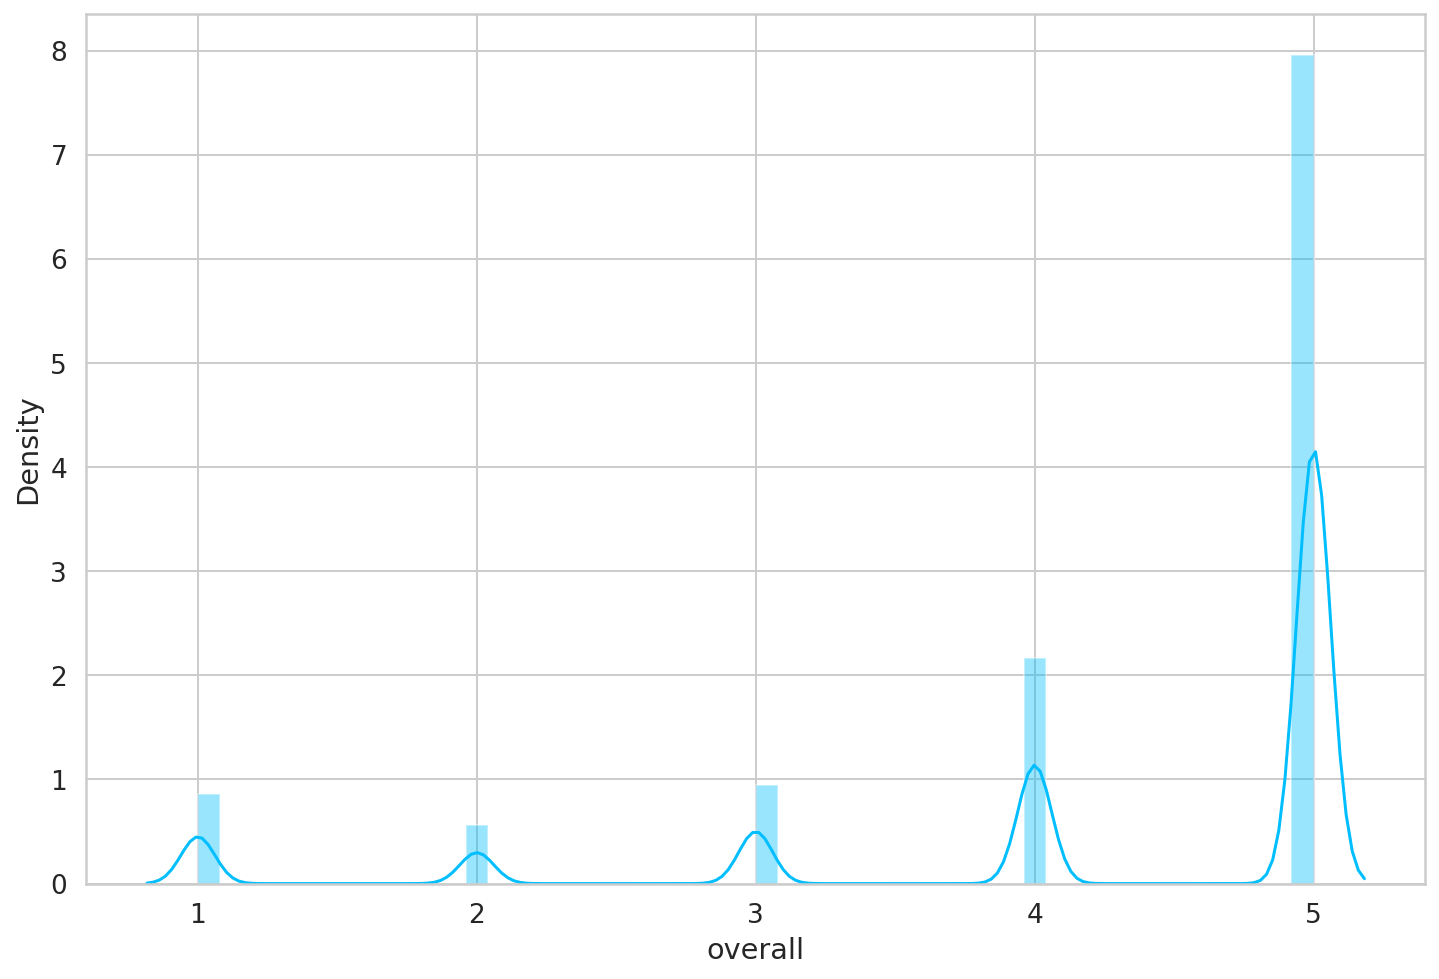

In [ ]:
sns.distplot(data.overall)

In [ ]:
data['Sentiment'] = data['overall'].apply(lambda x: "negetive" if x<3 else("positive" if x>3 else "neutral"))

In [ ]:
data.Sentiment

0          positive
1           neutral
2          positive
3          positive
4           neutral
             ...   
2999995    negetive
2999996    positive
2999997    positive
2999998    positive
2999999    positive
Name: Sentiment, Length: 3000000, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


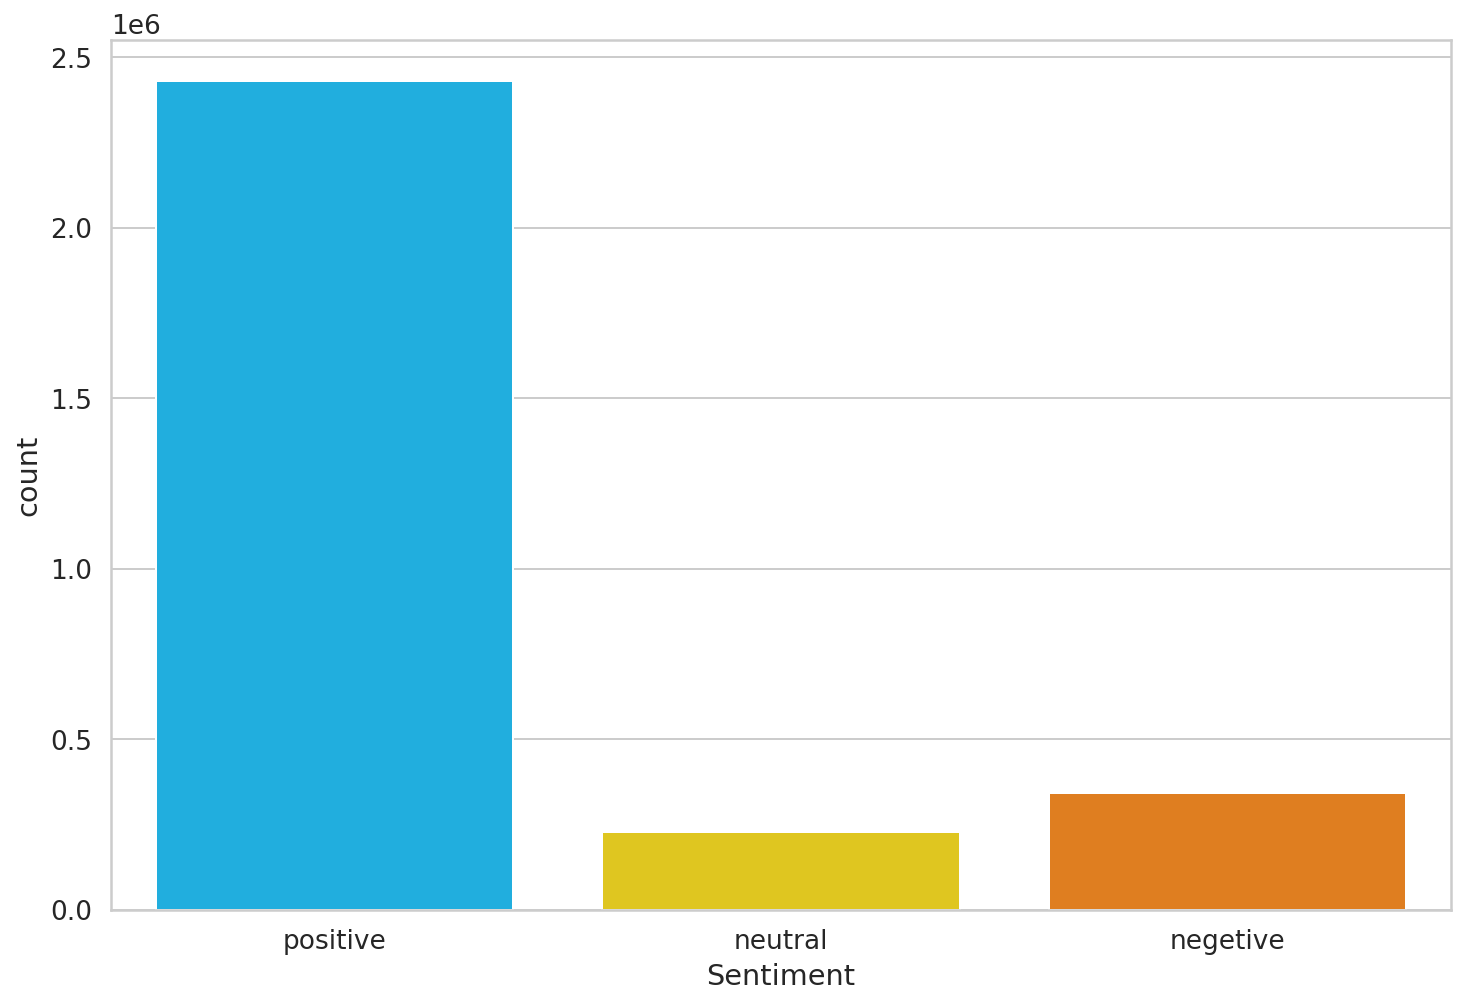

In [ ]:
sns.countplot(data.Sentiment)

In [ ]:
#create three dataframes for three type of sentiment
positive_reviews = data[data.Sentiment == "positive"] 
negetive_reviews = data[data.Sentiment == "negetive"]
neutral_reviews = data[data.Sentiment == "neutral"]
print(positive_reviews.shape)
print(neutral_reviews.shape)
print(negetive_reviews.shape)

(2429770, 7)
(228272, 7)
(341958, 7)


In [ ]:
positive_review_text = " ".join(positive_reviews.reviewText.to_numpy().tolist())
negetive_review_text = " ".join(negetive_reviews.reviewText.to_numpy().tolist())
neutral_review_text = " ".join(neutral_reviews.reviewText.to_numpy().tolist())


In [ ]:
positive_review_cloud = WordCloud(stopwords = STOPWORDS, background_color = "white").generate(positive_review_text[:90000000])
negetive_review_cloud = WordCloud(stopwords = STOPWORDS, background_color = "white").generate(negetive_review_text)


In [ ]:
def show_word_cloud(cloud):
  plt.figure(figsize=(16,10))
  plt.imshow(cloud, interpolation= 'bilinear')
  plt.axis('off')
  plt.show()

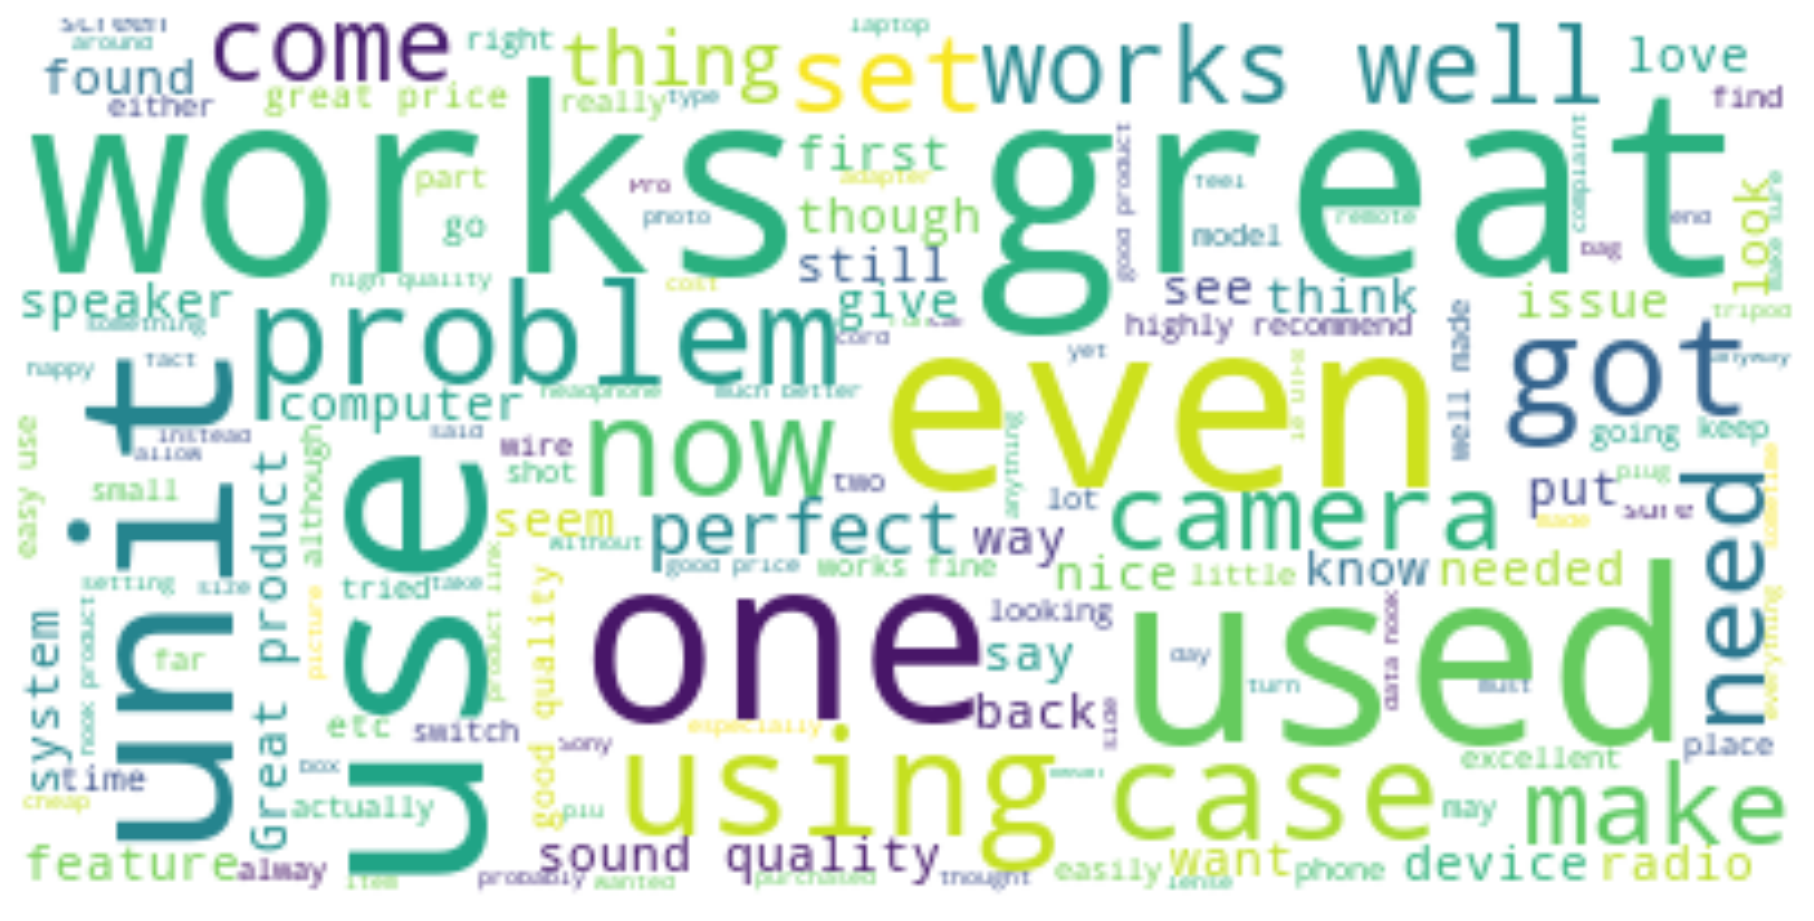

In [ ]:
show_word_cloud(positive_review_cloud)

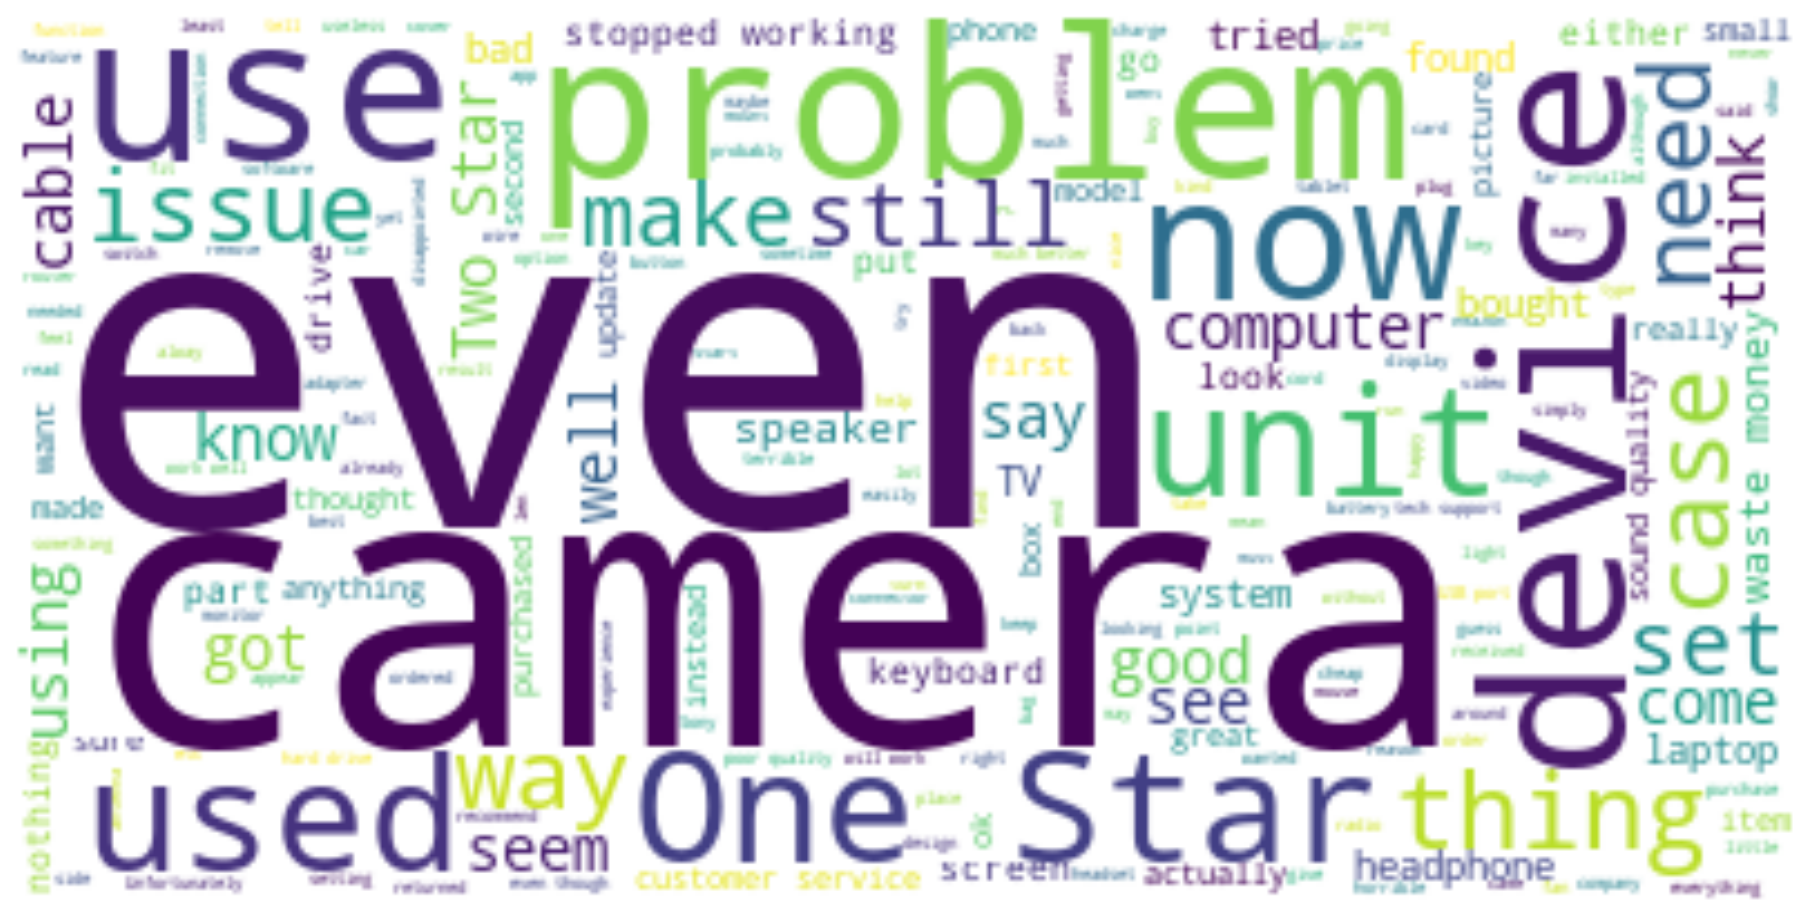

In [ ]:
show_word_cloud(negetive_review_cloud)

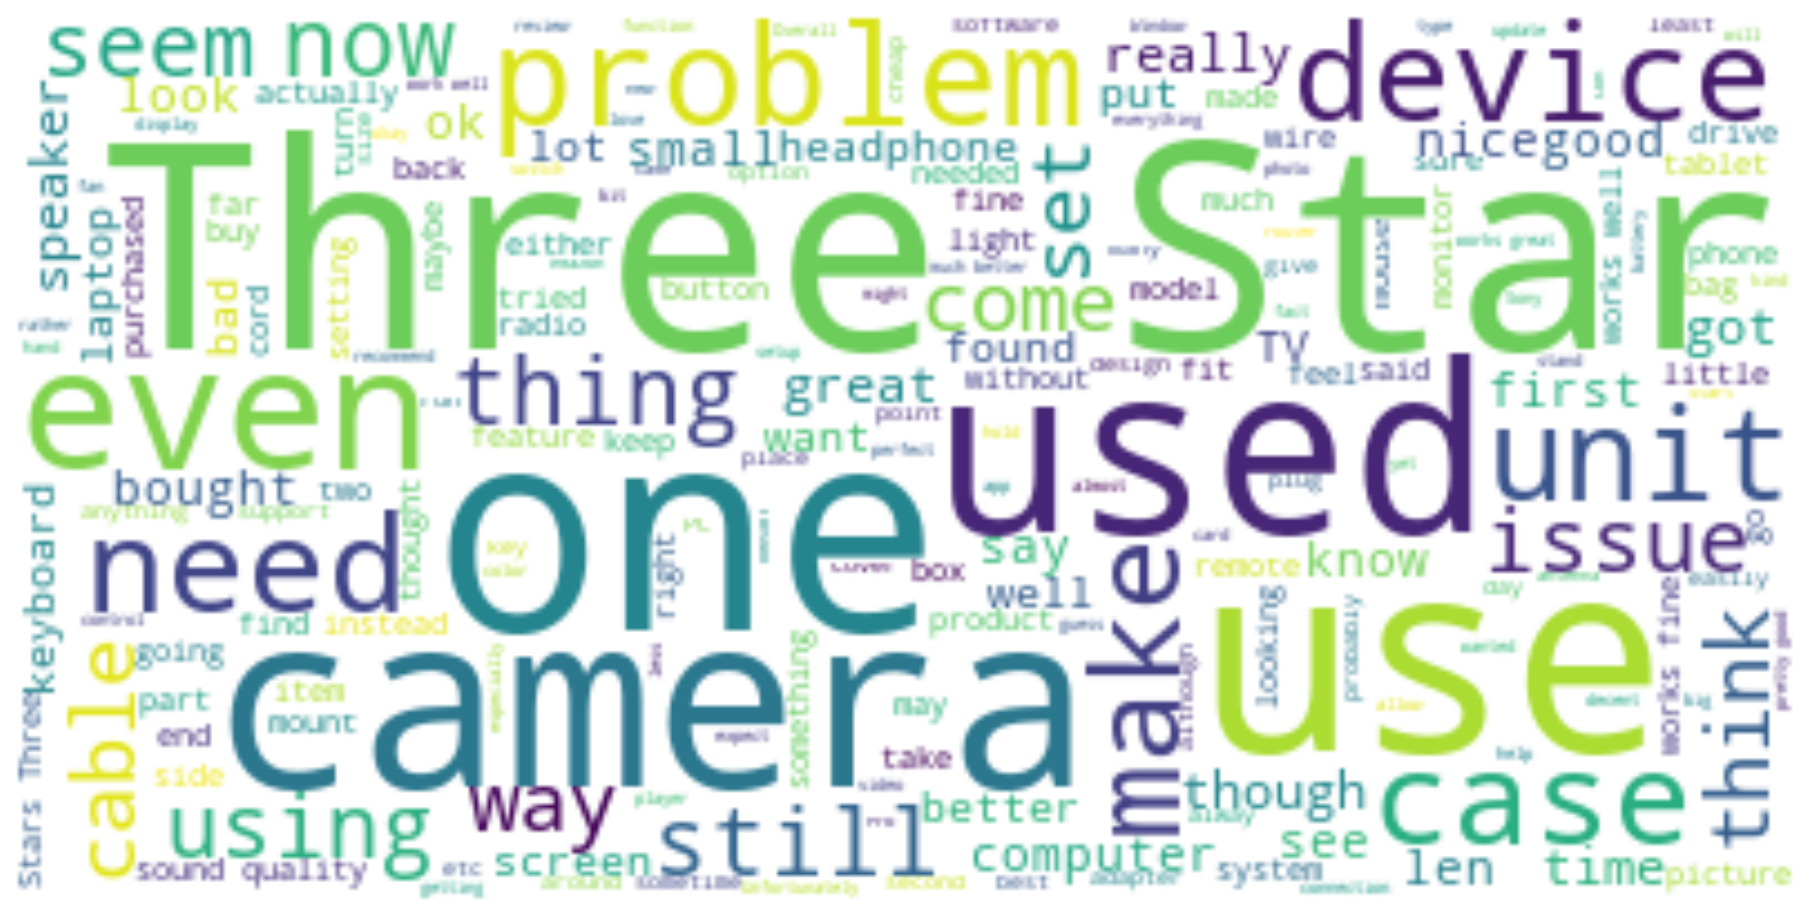

In [ ]:
neutral_review_cloud = WordCloud(stopwords = STOPWORDS, background_color = "white").generate(neutral_review_text)
show_word_cloud(neutral_review_cloud)

In [ ]:
#Even out the number of positive, negetive and neutral reviews
positive_df = positive_reviews.sample(n=len(neutral_reviews), random_state= RANDOM_SEED)
negetive_df = negetive_reviews.sample(n=len(neutral_reviews), random_state= RANDOM_SEED)
neutral_df = neutral_reviews

In [ ]:
print(positive_df.shape,negetive_df.shape,neutral_df.shape)

(228272, 7) (228272, 7) (228272, 7)


In [ ]:
temp_df = positive_df.append(negetive_df).reset_index(drop = True)
final_df = temp_df.append(neutral_df).reset_index(drop = True)

In [ ]:
final_df.shape

(684816, 7)

In [ ]:
final_df.head(100)

,overall,vote,verified,reviewTime,reviewText,summary,Sentiment
0,5,0,True,2015-01-09,Just bad ASS,"Just Bad Ass, Everything has come to this, Wha...",positive
1,5,0,True,2015-11-16,Great headset with very good noise reduction.,1447632000,positive
2,5,0,True,2010-03-02,JMieses Review,1267488000,positive
3,5,0,True,2014-10-13,Nice products....,Five Stars,positive
4,5,0,True,2015-01-12,Excellent range and easy to setup.,1421020800,positive
...,...,...,...,...,...,...,...
95,4,0,True,2009-12-26,Shipping costs...,1261785600,positive
96,4,0,True,2014-09-18,I couple it with a Bluetooth keyboard and is l...,1410998400,positive
97,5,2,True,2011-11-06,Cable works great!,1320537600,positive
98,4,0,True,2015-03-24,Great use to hide coax cable along the house,Four Stars,positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


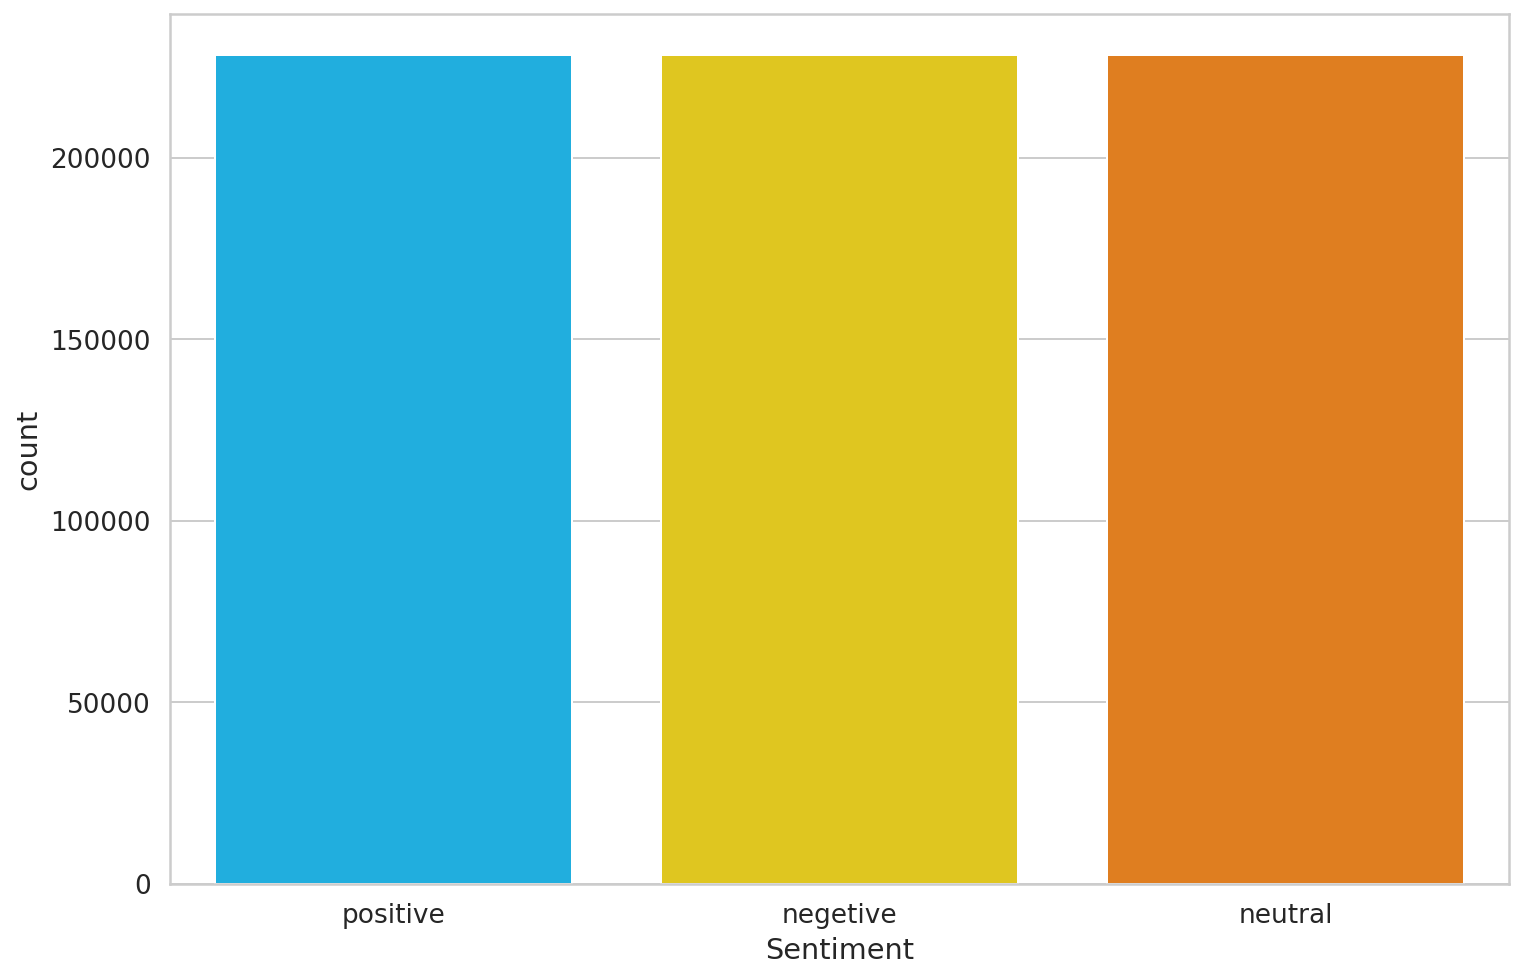

In [ ]:
sns.countplot(final_df.Sentiment)

In [ ]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")

In [ ]:
from sklearn.preprocessing import OneHotEncoder
my_encoder = OneHotEncoder(sparse =False)
transformed_sentiment = my_encoder.fit_transform(final_df.Sentiment.to_numpy().reshape(-1,1))

In [ ]:
transformed_sentiment[600000]

array([0., 1., 0.])